In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [551]:
real2002_2018 = pd.read_csv('/root/python/Project/Datasets/Milwaukee_real_estate_2002-2018.csv')
real2019 = pd.read_csv('/root/python/Project/Datasets/Milwaukee_real_estate_2019.csv', thousands=',')
real2020 = pd.read_csv('/root/python/Project/Datasets/Milwaukee_real_estate_2020.csv', thousands=',')

Data Preprocessing

In [552]:
real2002_2018.head(2)

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,5291315210,6611 W OKLAHOMA AV,NaN,11,6288,Service Building,NaN,1.0,1980,0,440,1,0,0,0,5080,2011-02,190000
1,Commercial,1719850000,3526 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1924,0,2919,1,0,0,0,5210,2011-02,82280


In [553]:
real2019.head(2)

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98422,Manufacturing,10011000,9400 N 124TH ST,NaN,9,6300,Pole Building,Metal Siding,1.0,2005.0,NaN,18000,1,NaN,NaN,NaN,0,3/11/2019,675000.0
1,98453,Commercial,30023110,10545 W DONGES CT,NaN,9,6202,Warehouse Building - 1 Story,Concrete Block,1.0,1973.0,NaN,27940,5,NaN,NaN,NaN,100188,9/13/2019,1300000.0


In [554]:
real2020.head(2)

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,848609,Residential,40062000,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,2615.0,1,4.0,3,1,16588,2/13/2020,357000
1,859441,Residential,40062000,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,2615.0,1,4.0,3,1,16588,10/15/2020,369900


In [555]:
real2019.drop ('PropertyID',axis=1, inplace= True)
real2020.drop ('PropertyID',axis=1, inplace= True)

In [556]:
column = ['prop_type', 'taxkey', 'address', 'condoproject', 'district', 'nbhd',
       'style', 'extwall', 'stories', 'year_built', 'rooms', 'finished_sqft',
       'units', 'bdrms', 'f_bath', 'h_bath', 'lot_size', 'sale_date',
       'sale_price'] 
real2002_2018.columns = column
real2019.columns = column
real2020.columns = column


In [557]:
def year(string):
    return string[:4]

def sale_year19(date):
    return 2019

def sale_year20(date):
    return 2020

In [558]:
real2002_2018['sale_year'] = real2002_2018['sale_date'].apply(year)
real2019['sale_year'] = real2019['sale_date'].apply(sale_year19)
real2020['sale_year'] = real2020['sale_date'].apply(sale_year20)

In [559]:
#Combining the datasets from 2002 to 2020
combined = pd.concat([real2002_2018,real2019,real2020], axis = 0)
combined = combined.reset_index(drop=True)
combined.head()


,prop_type,taxkey,address,condoproject,district,nbhd,style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_date,sale_price,sale_year
0,Commercial,5291315210,6611 W OKLAHOMA AV,NaN,11.0,6288.0,Service Building,NaN,1.0,1980.0,0.0,440.0,1,0.0,0.0,0.0,5080,2011-02,190000.0,2011
1,Commercial,1719850000,3526 W SILVER SPRING DR,NaN,1.0,6218.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1924.0,0.0,2919.0,1,0.0,0.0,0.0,5210,2011-02,82280.0,2011
2,Commercial,3922587000,400 N BROADWAY,NaN,4.0,6296.0,"Store Building - Single tenant, 1 story",NaN,10.0,1911.0,0.0,2714.0,1,0.0,0.0,0.0,588,2011-02,305000.0,2011
3,Commercial,3101385000,2901 N 23RD ST,NaN,7.0,6256.0,Tavern,NaN,2.0,1910.0,0.0,2976.0,1,0.0,0.0,0.0,3650,2011-02,96900.0,2011
4,Commercial,810291000,8220 W SLESKE CT,NaN,9.0,6420.0,Warehouse Building - 1 Story,NaN,1.0,1986.0,0.0,49802.0,1,0.0,0.0,0.0,129373,2011-02,1785000.0,2011


In [560]:
prop_group = combined.groupby('prop_type')
prop_group.count()

,taxkey,address,condoproject,district,nbhd,style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_date,sale_price,sale_year
prop_type,,,,,,,,,,,,,,,,,,,
Commercial,3374,3374,0,3374,3374,3374,427,3367,3371,3083,3374,3374,3083,3075,3075,3374,3374,3374,3374
Condominium,7332,7332,7328,7332,7332,7326,0,7310,7332,7329,7332,7332,7329,7331,6751,7332,7332,7330,7332
Exempt,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Lg Apartment,1514,1514,941,1514,1514,1514,490,1504,1511,1345,1514,1514,1345,1184,1183,1514,1514,1514,1514
Manufacturing,13,13,0,13,13,13,10,10,10,0,13,13,0,2,2,13,13,13,13
Residential,34609,34609,0,34608,34584,34591,34577,34603,34603,34582,34589,34609,34582,34599,30999,34609,34609,34601,34609
Vacant Land,232,232,0,232,232,232,0,232,232,232,232,232,232,232,232,232,232,232,232


In [561]:
residential = prop_group.get_group('Residential')
condominium = prop_group.get_group('Condominium')

In [562]:
#Creating a dataframe with details for Residential and Condominium properties from 2002 to 2020
df = pd.concat([residential,condominium], axis=0)
df= df.reset_index(drop=True) #resets the index for the new dataframe
# df.head()

In [563]:
style = df.groupby('style')
style.count()

,prop_type,taxkey,address,condoproject,district,nbhd,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_date,sale_price,sale_year
style,,,,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
**,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
150700,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
303,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apartment,53,53,53,53,53,53,0,53,53,53,53,53,53,53,53,53,53,53,53
hi rise,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
hi-rise,19,19,19,19,19,19,0,19,19,19,19,19,19,19,19,19,19,19,19


In [564]:
#Filtering the building types to reduce redundancy and removing the 'style' column
correct_style = {
'APARMENT': 'Apartment',
'APARTMENMT': 'Apartment',
'APARTMENT': 'Apartment',
'Apartment': 'Apartment',
'Apartment ': 'Apartment',
'Apartment - Mix' : 'Apartment',
'Apartment- Mix' : 'Apartment',
'Apartment-Mix' : 'Apartment',
'Apartment -Mix' : 'Apartment',
'Apartment  - Mix' : 'Apartment',
'`APARTMENT':'Apartment',
'apartment':'Apartment',
'AP 1' : 'Unknown',
' ':'Apartment',
'1':'Apartment',
'150700': 'Apartment',
'303' : 'Apartment',
'6242010' : 'Apartment',
"63,500 for '09. UNF." : 'Apartment',
'810' : 'Apartment',
'Other' : 'Apartment',
'BI-Tri' : 'Bi Level',
'BI/TRI' :'Bi Level',
'BILEVEL' :'Bi Level',
'Bi-Level': 'Bi Level',
'Milwaukee Bungalow' : 'Bungalow',
'COLONIAL': 'Colonial',	
'Condo BI/TRI Level': 'Condo BI/TRI Level',
'Condo Duplex':'Condo Duplex',
'Condo Ranch':'Condo Ranch',
'Condo Townhouse': 'Condo Townhouse',
'DUPLEX': 'Duplex',
'DUPLEX/OTHER': 'Duplex',
'Dplx Bungalow': 'Duplex',
'Duplex N/S':'Duplex',
'Duplex O/S':'Duplex',
'Duplex-Cottage':'Duplex',
'OLD STYLE DUPLEX': 'Duplex', 
'Garden Style ':'Garden Style',
'HI RISE':'High Rise',
'HI-RISE':'High Rise',
'HIGH RISE':'High Rise',
'HIRISE':'High Rise',
'Hi Rise':'High Rise',
'hi rise':'High Rise',
'hi-rise':'High Rise',
'Hi-Rise' :'High Rise',
'High Rise > 12 Stories':'High Rise',	
'Low Rise 1-3 Stories':'Low Rise',
'MIXED': 'Mixed',
'MIXED ': 'Mixed',
'MIXED STYLES': 'Mixed',
'MOTEL STYLE': 'Mixed',	
'Mixed Styles': 'Mixed',
'Mid RIse 4-12 Stories':'Mid Rise',
'OBY': 'Open by Appointment Only',
'OTHER' : 'Other',
'RANCH': 'Ranch',
'ROW HOUSE': 'Row House',
'Res O/S 1 Story': 'Residence Off Site',	
'Res O/S A & 1/2':'Residence Off Site',
'Residence O/S'	:'Residence Off Site',
'Residence O/S 2sty+':'Residence Off Site',
'Rm or Rooming House':'Rooming House',
'SPLIT LEVEL': 'Split Level',
'TOWN HOUSE':'Townhouse',
'Town House': 'Townhouse',
'TOWNHOUSE':'Townhouse',
'townhouse':'Townhouse',
'townhse':'Townhouse',
'Townhouse' : 'Townhouse',
'TRILEVEL':'Tri Level',
'TRIPLEX' :'Triplex',
'UNKWN': 'Unknown',
'WAREHOUSE' :'Warehouse'}

df['fil_style'] = df['style'].replace(correct_style)

df['fil_style'].unique()


array(['Duplex', 'Bungalow', 'Ranch', 'Residence Off Site',
       'Rooming House', 'Triplex', 'Tudor', 'Cape Cod', 'Colonial',
       'Cottage', 'Townhouse', 'Split Level', 'Bi Level', 'Mansion', '**',
       'Open by Appointment Only', 'Unknown',
       'Multiple Residential Bldgs', 'Contemporary', nan, 'Apartment',
       'Warehouse', 'High Rise', 'Mixed', 'Tri Level', 'Garden Style',
       'Row House', 'Other', 'Condo Townhouse', 'Condo Ranch', 'Low Rise',
       'Condo BI/TRI Level', 'Condo Duplex', 'Mid Rise'], dtype=object)

In [565]:
df =df[['prop_type','taxkey', 'address', 'condoproject','district','nbhd', 'style', 'fil_style', 'extwall',
        'stories', 'year_built', 'rooms', 'finished_sqft',
       'units', 'bdrms', 'f_bath', 'h_bath', 'lot_size', 'sale_year', 'sale_date',
       'sale_price']]
df.head(2)

,prop_type,taxkey,address,condoproject,district,nbhd,style,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_date,sale_price
0,Residential,3461287000,2002 N 56TH ST,NaN,10.0,2540.0,Dplx Bungalow,Duplex,Aluminum / Vinyl,2.0,1923.0,0.0,2922.0,2,6.0,2.0,0.0,4800,2017,2017-04,230000.0
1,Residential,3461151000,2000 N 59TH ST,NaN,10.0,2540.0,Dplx Bungalow,Duplex,Aluminum / Vinyl,2.0,1927.0,0.0,2700.0,2,6.0,2.0,0.0,4760,2017,2017-04,190250.0


In [566]:
df.drop(df[df['fil_style']=='**'].index,inplace=True, axis = 0)


In [567]:
#Setting the number of rows and columns that can be displayed in the output
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [568]:
df.groupby('prop_type').count()


,taxkey,address,condoproject,district,nbhd,style,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_date,sale_price
prop_type,,,,,,,,,,,,,,,,,,,,
Condominium,7332,7332,7328,7332,7332,7326,7326,0,7310,7332,7329,7332,7332,7329,7331,6751,7332,7332,7332,7330
Residential,34608,34608,0,34607,34583,34590,34590,34577,34602,34602,34581,34588,34608,34581,34598,30998,34608,34608,34608,34600


In [569]:
df.drop(['taxkey','style', 'address', 'condoproject', 'sale_date'], axis=1,inplace = True)

In [570]:
df.isnull().sum()

prop_type           0
district            1
nbhd               25
fil_style          24
extwall          7363
stories            28
year_built          6
rooms              30
finished_sqft      20
units               0
bdrms              30
f_bath             11
h_bath           4191
lot_size            0
sale_year           0
sale_price         10
dtype: int64

In [571]:
df.groupby('prop_type').count()

,district,nbhd,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_price
prop_type,,,,,,,,,,,,,,,
Condominium,7332,7332,7326,0,7310,7332,7329,7332,7332,7329,7331,6751,7332,7332,7330
Residential,34607,34583,34590,34577,34602,34602,34581,34588,34608,34581,34598,30998,34608,34608,34600


In [572]:
test_df = df[df['sale_price'].isnull()]

In [573]:
df[(df['fil_style'].isnull()) & (df['prop_type']=='Condominium')]

,prop_type,district,nbhd,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_price
34998,Condominium,4.0,5390.0,NaN,NaN,1.0,1893.0,4.0,888.0,1,1.0,1.0,0.0,0,2016,163000.0
35596,Condominium,3.0,5924.0,NaN,NaN,3.0,2005.0,5.0,1825.0,1,2.0,2.0,1.0,0,2016,343500.0
37031,Condominium,12.0,5388.0,NaN,NaN,1.0,2006.0,4.0,1108.0,1,1.0,1.0,0.0,0,2016,265000.0
37639,Condominium,12.0,5388.0,NaN,NaN,1.0,2006.0,4.0,1108.0,1,1.0,1.0,0.0,0,2015,247500.0
39805,Condominium,4.0,5390.0,NaN,NaN,1.0,1893.0,4.0,888.0,1,1.0,1.0,0.0,0,2010,139500.0
39865,Condominium,3.0,5924.0,NaN,NaN,3.0,2005.0,5.0,1825.0,1,2.0,2.0,1.0,0,2012,275500.0


Filtering out the Nan values 

In [574]:
# Only one null value in district and replaced with the value of other properties in the same neighbourhood
df['district'][df['district'].isnull()]=780 

# Replacing the null values for condominium in the extwall column with 'No extwall'
df['extwall'][(df['prop_type']=='Condominium')]='No extwall'

# Filtering f_bath and h_bath columns
df['h_bath'][(df['h_bath'].isnull()) & (df['f_bath'].notnull())]=0
df['h_bath'][(df['h_bath'].notnull()) & (df['f_bath'].isnull())]=0
df['f_bath'] = df['f_bath'].fillna(1)
df.drop(df[(df['h_bath'].isnull()) & (df['f_bath'].isnull())].index,inplace=True)

#Filtering null values in stories column
df['stories'][(df['stories'].isnull())|(df['stories']==0)] = 1

#Filtering out null values in finished_sqft column
df.drop(df[df['finished_sqft']==0].index,axis=0,inplace = True)

#Filtering null values in fil_style, nbhd,fil_style, finished_sqft, units,sale_price, bdrms & extwall columns
df['fil_style'][(df['fil_style'].isnull()) & (df['prop_type']=='Condominium')]='Apartment'
df.dropna(subset=['nbhd','fil_style', 'finished_sqft','units','sale_price', 'bdrms', 'extwall'],inplace=True)


In [575]:
# Changing string objects into int and float
df['year_built']= df['year_built'].astype('int')
df['sale_year'] = df['sale_year'].astype('int')
df['nbhd'] = df['nbhd'].astype('int')
df['district'] = df['district'].astype('int')
df['lot_size'] = df['lot_size'].astype('float')
df['finished_sqft'] = df['finished_sqft'].astype('float')


In [576]:
df.describe()

,district,nbhd,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_price
count,41845.000000,41845.000000,41845.000000,41845.000000,41845.000000,41845.000000,41845.000000,41845.000000,41845.000000,41842.000000,41845.000000,41845.000000,4.184500e+04
mean,8.090668,3413.142024,1.297682,1941.907396,2.321448,1464.526706,1.176891,3.179496,1.466675,0.328330,5096.170725,2015.813861,1.612691e+05
std,5.606999,1632.470957,0.445872,89.404428,3.162290,620.516256,0.422535,9.983359,0.595260,0.516856,4018.624027,3.414087,1.452428e+05
min,1.000000,40.000000,1.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,0.000000e+00
25%,5.000000,2080.000000,1.000000,1924.000000,0.000000,1052.000000,1.000000,2.000000,1.000000,0.000000,3600.000000,2013.000000,9.500000e+04
50%,9.000000,4020.000000,1.000000,1950.000000,0.000000,1288.000000,1.000000,3.000000,1.000000,0.000000,5000.000000,2017.000000,1.380000e+05
75%,11.000000,4660.000000,1.500000,1959.000000,5.000000,1734.000000,1.000000,4.000000,2.000000,1.000000,6600.000000,2019.000000,1.850000e+05
max,780.000000,5999.000000,4.000000,2020.000000,21.000000,9698.000000,13.000000,2031.000000,10.000000,10.000000,219978.000000,2020.000000,4.500000e+06


Bedroom

In [577]:
# Filtering out values that are 0 in f_bath and _h_bath columns
df.drop(df[(df['f_bath']==0) & (df['h_bath']==0)].index, inplace= True)
df['bdrms'][(df['bdrms']==0)]=1

#Harmonizing the rooms column based in the number of bdrms. h_bath and f_bath columns
df['rooms'][(df['rooms']<=df['bdrms']+df['h_bath']+df['f_bath'])]=df['bdrms']+df['h_bath']+df['f_bath']

In [578]:
# # Average difference between the lot size and the finished_sqft for 2 storied residential property: 3813 sqft
dif_residential_2 = df[(df['prop_type']=='Residential') & (df['stories']==2)]
dif_residential_2['dif_sqft']=dif_residential_2['lot_size']-dif_residential_2['finished_sqft']
dif_residential_2['dif_sqft'].mean()

# Average difference between the lot size and the finished_sqft for 1 storied residential property: 5201 sqft
dif_residential_1 = df[(df['prop_type']=='Residential') & (df['stories']==1)]
dif_residential_1['dif_sqft']=dif_residential_1['lot_size']-dif_residential_1['finished_sqft']
dif_residential_1['dif_sqft'].mean()

# Average difference between the lot size and the finished_sqft for 1.5 storied residential property: 3707 sqft
dif_residential_1_5 = df[(df['prop_type']=='Residential') & (df['stories']==1.5)]
dif_residential_1_5['dif_sqft']=dif_residential_1_5['lot_size']-dif_residential_1_5['finished_sqft']
dif_residential_1_5['dif_sqft'].mean()

#Replacing 0 values in the lot size column for residential properties
df['lot_size'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==2)] = df['finished_sqft'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==2)] + dif_residential_2['dif_sqft'].mean()
df['lot_size'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==1)] = df['finished_sqft'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==1)] + dif_residential_1['dif_sqft'].mean()
df['lot_size'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==1.5)] = df['finished_sqft'][((df['lot_size']==0))&(df['prop_type']=='Residential')&(df['stories']==1.5)] + dif_residential_1_5['dif_sqft'].mean()


In [579]:
# Lot_size for condominiums not avaiilable in the dataset
df[df['prop_type']=='Condominium'].groupby('lot_size').count()

,prop_type,district,nbhd,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,sale_year,sale_price
lot_size,,,,,,,,,,,,,,,
0.0,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539,6539
1.0,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762


In [580]:
#Replacing 0 value in the units column with average units by property type
df['units'][df['units']==0]= 1

In [583]:
df

,prop_type,district,nbhd,fil_style,extwall,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_price
0,Residential,10,2540,Duplex,Aluminum / Vinyl,2.0,1923,8.0,2922.0,2,6.0,2.0,0.0,4800.0,2017,230000.0
1,Residential,10,2540,Duplex,Aluminum / Vinyl,2.0,1927,8.0,2700.0,2,6.0,2.0,0.0,4760.0,2017,190250.0
2,Residential,10,2600,Duplex,Aluminum / Vinyl,2.0,1924,9.0,2534.0,2,7.0,2.0,0.0,4200.0,2017,149000.0
3,Residential,10,2600,Duplex,Brick,1.5,1920,5.0,2136.0,2,3.0,2.0,0.0,5880.0,2017,183400.0
4,Residential,10,2510,Duplex,Aluminum / Vinyl,1.5,1925,6.0,1888.0,2,4.0,2.0,0.0,5400.0,2017,57000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41936,Condominium,13,5360,Low Rise,No extwall,2.0,1974,4.0,1100.0,1,2.0,1.0,1.0,1.0,2020,100000.0
41937,Condominium,13,5360,Low Rise,No extwall,1.0,1974,5.0,1141.0,1,2.0,1.0,1.0,1.0,2020,110000.0
41938,Condominium,13,5360,Low Rise,No extwall,2.0,1974,5.0,1100.0,1,2.0,1.0,1.0,1.0,2020,95000.0
41939,Condominium,13,5360,Low Rise,No extwall,2.0,1974,5.0,1100.0,1,2.0,1.0,1.0,1.0,2020,100000.0


Data Analysis

In [581]:
fil_df = df
fil_df.describe()

,district,nbhd,stories,year_built,rooms,finished_sqft,units,bdrms,f_bath,h_bath,lot_size,sale_year,sale_price
count,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41823.000000,41826.000000,41826.000000,4.182600e+04
mean,8.090494,3412.878353,1.297614,1941.908382,5.481638,1464.170349,1.176923,3.184263,1.467341,0.328480,5118.858211,2015.814804,1.611648e+05
std,5.607847,1632.550812,0.445856,89.418108,10.092204,619.383134,0.422521,9.984371,0.594574,0.516926,4006.928349,3.413890,1.446114e+05
min,1.000000,40.000000,1.000000,0.000000,2.000000,256.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2002.000000,0.000000e+00
25%,5.000000,2080.000000,1.000000,1924.000000,4.000000,1052.000000,1.000000,2.000000,1.000000,0.000000,3600.000000,2013.000000,9.500000e+04
50%,9.000000,4020.000000,1.000000,1950.000000,5.000000,1288.000000,1.000000,3.000000,1.000000,0.000000,5040.000000,2017.000000,1.380000e+05
75%,11.000000,4620.000000,1.500000,1959.000000,6.000000,1733.000000,1.000000,4.000000,2.000000,1.000000,6600.000000,2019.000000,1.850000e+05
max,780.000000,5999.000000,4.000000,2020.000000,2033.000000,9698.000000,13.000000,2031.000000,10.000000,10.000000,219978.000000,2020.000000,4.500000e+06


In [582]:
fil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41826 entries, 0 to 41940
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prop_type      41826 non-null  object 
 1   district       41826 non-null  int64  
 2   nbhd           41826 non-null  int64  
 3   fil_style      41826 non-null  object 
 4   extwall        41826 non-null  object 
 5   stories        41826 non-null  float64
 6   year_built     41826 non-null  int64  
 7   rooms          41826 non-null  float64
 8   finished_sqft  41826 non-null  float64
 9   units          41826 non-null  int64  
 10  bdrms          41826 non-null  float64
 11  f_bath         41826 non-null  float64
 12  h_bath         41823 non-null  float64
 13  lot_size       41826 non-null  float64
 14  sale_year      41826 non-null  int64  
 15  sale_price     41826 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 6.4+ MB


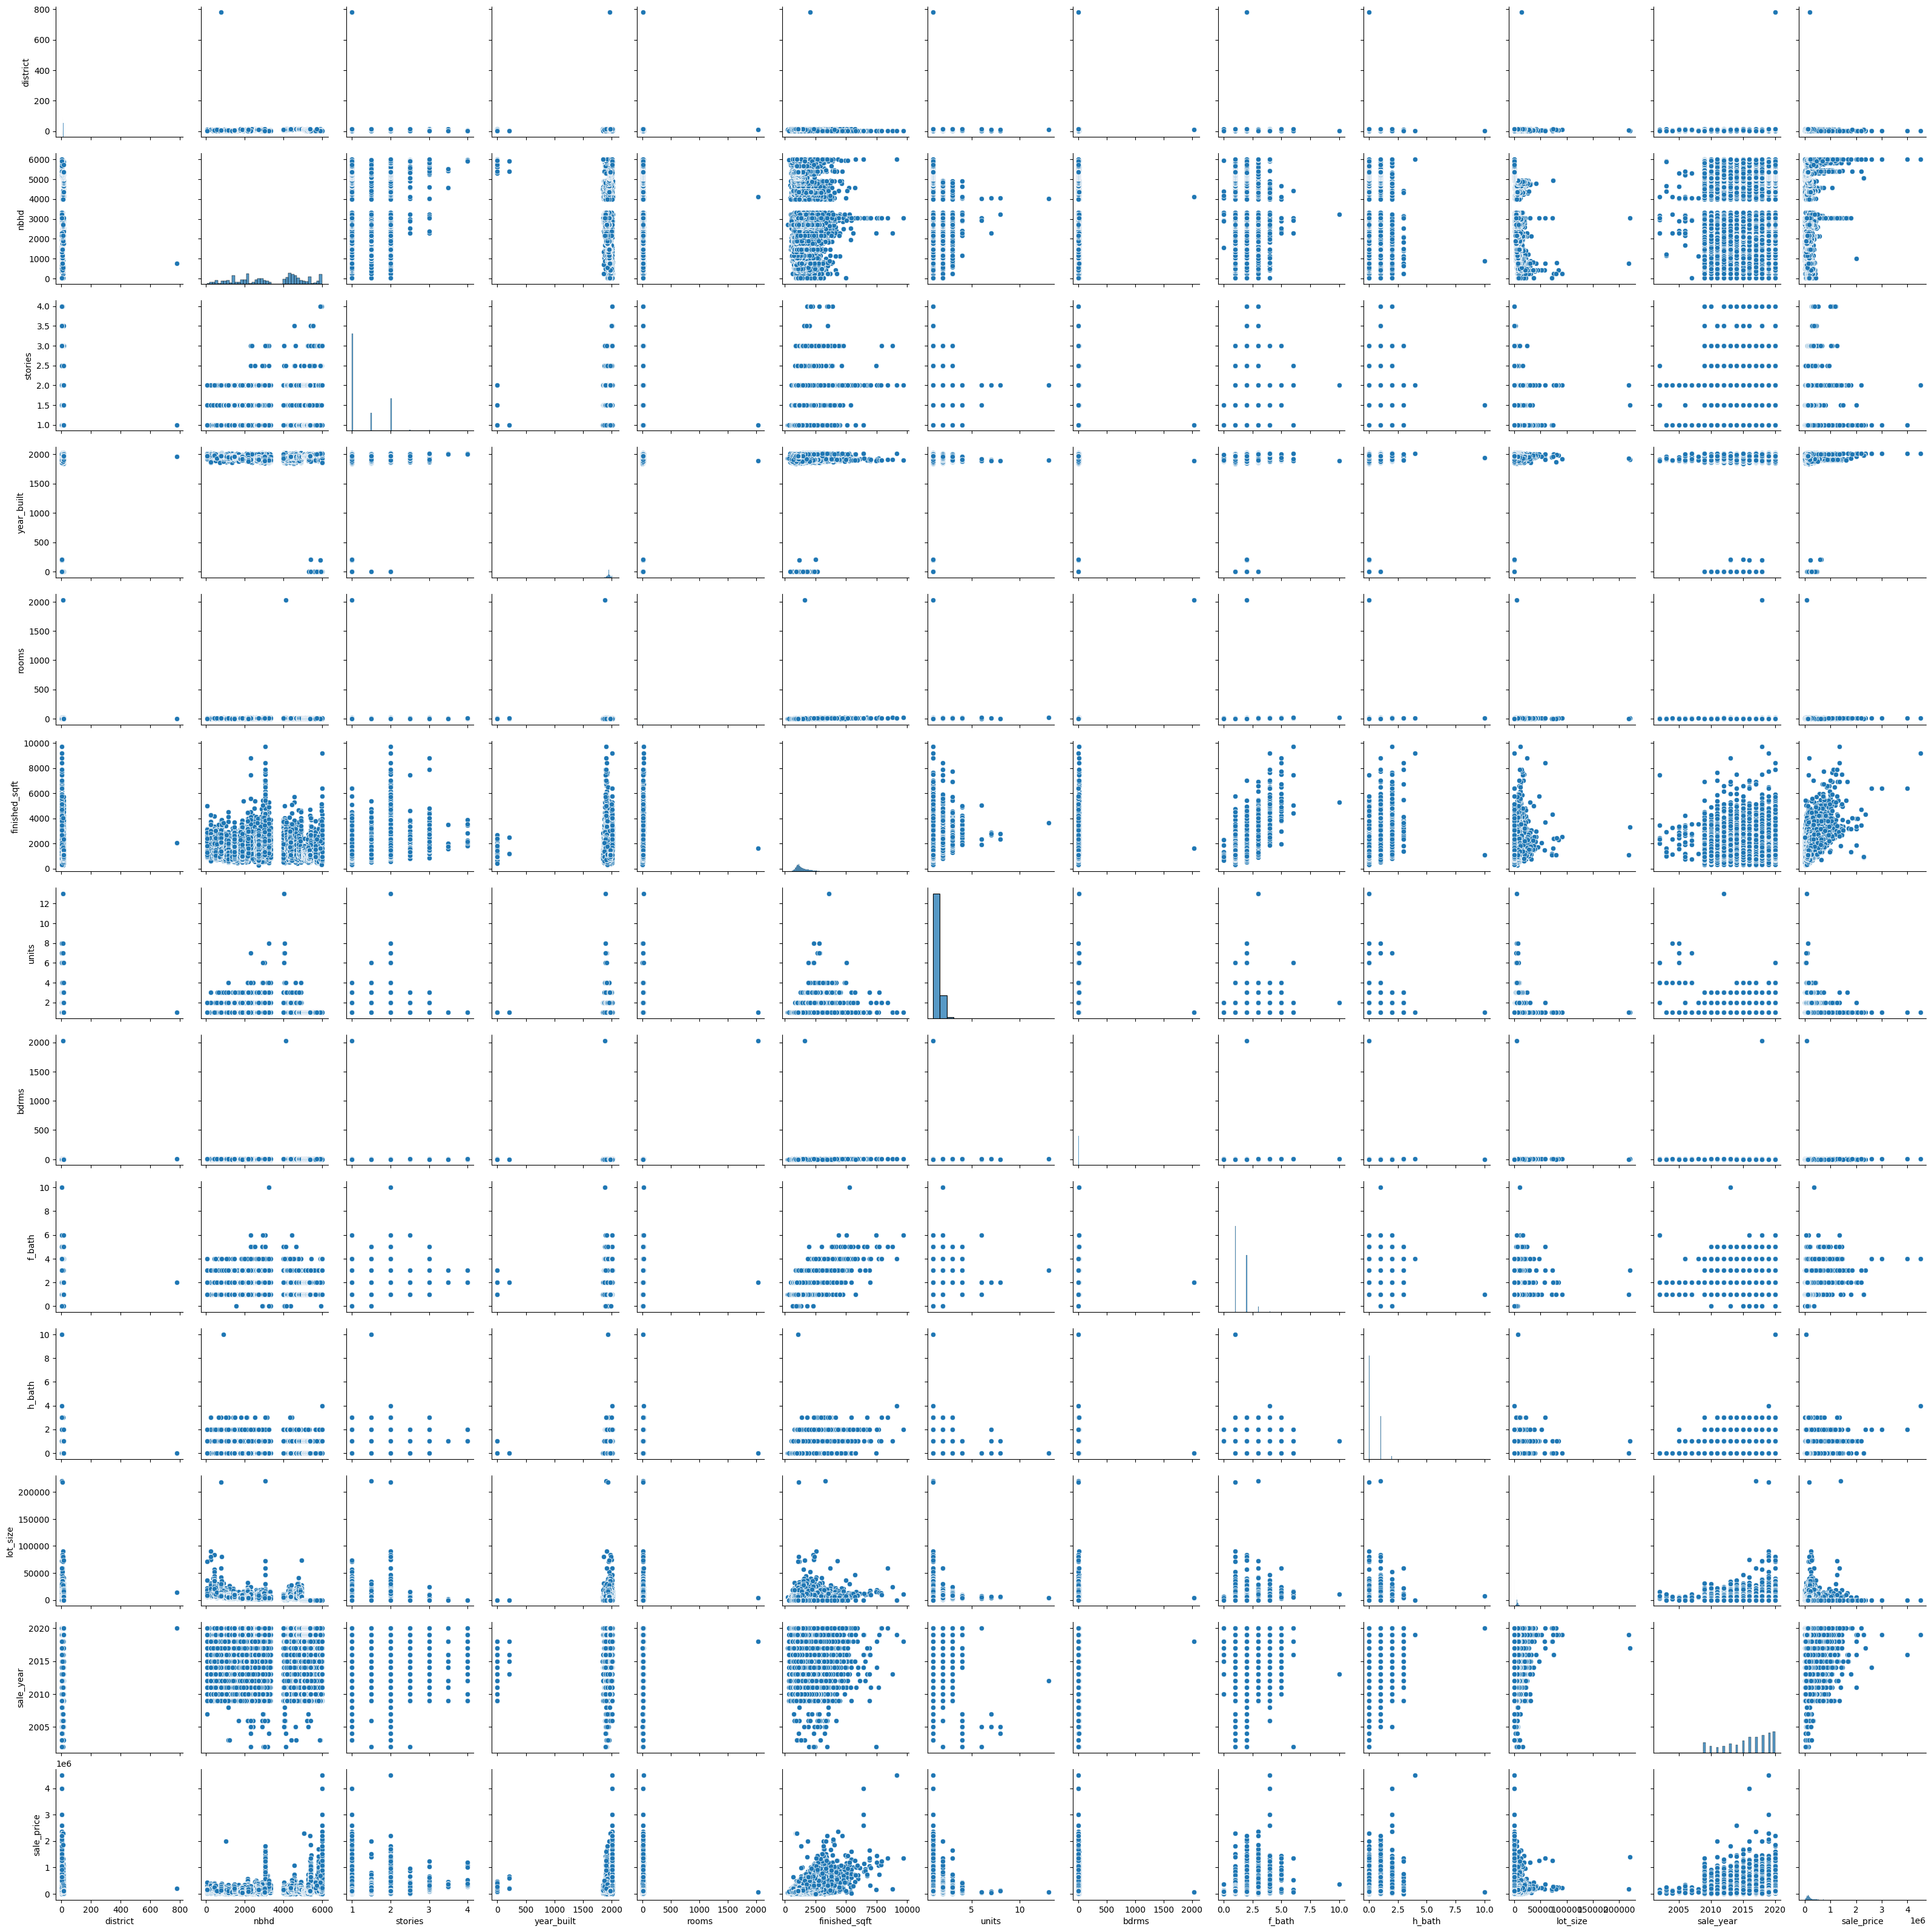

In [585]:
sns.pairplot(fil_df)

Assumptions:
- Property type 'Condominiums' are assumed to not have external walls unlike the residential properties
- Half bathrooms for properties with unknown number (Nan) of half bathrooms but having at least one full bathroom are assumed to be zero  
- Full bathrooms for properties with unknown number (Nan) of full bathrooms but having at least one half bathroom are assumed to be zero 
- Rows with Nan values for the 'stories' column(which includes only Condominiums) are assumed to have atleast 1 story
- Residential properties with lot size 0 have been replaced with the average difference between lot size and finished sqft of properties with lot size values based on the number of stories 
- Rows with Nan values for the 'stories' column(which includes only Condominiums) are assumed to have atleast 1 story 
Properties are assumed to have atleast 1 bedroom